In [1]:
## Research Question: Does the preference for homes outside of major urban areas persist post COVID-19?

In [2]:
### To explore the preferences for homes outside of the major urban area post COVID-19

###  1. Statistics on daily sales of homes sales in each region before, during and post COVID-19
###  2. Normalisation according to time (calculation of daily averages)
###  3. GIS: spatial exploration of daily housing sales
###  4. Daily sales of houses in six broad settlements
###  5. Statistical Measure

###  Step 3 was carried out in GIS

In [3]:
###  1. Statistics on daily sales of homes sales in each region before, during and post COVID-19  ###

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
# read in data
data = pd.read_csv("./House Price per Square Metre/York_link_13082022.csv")

In [3]:
# Convert the 'dateoftransfer' column to pandas datetime format
data['dateoftransfer'] = pd.to_datetime(data['dateoftransfer'])


In [4]:
# Define the date ranges
date_ranges = [
    ('2019-01-01', '2020-03-23'),
    ('2020-03-24', '2021-03-07'),
    ('2021-03-08', '2022-12-31')
]

In [5]:
# Function to filter data based on the date range
def filter_by_date_range(start_date, end_date):
    return data[(data['dateoftransfer'] >= start_date) & (data['dateoftransfer'] <= end_date)]

In [6]:
# Loop through the date ranges and count the number of transactions in each range
for start_date, end_date in date_ranges:
    filtered_data = filter_by_date_range(start_date, end_date)
    num_transactions = len(filtered_data)
    print(f"Number of transactions from {start_date} to {end_date}: {num_transactions}")

Number of transactions from 2019-01-01 to 2020-03-23: 3565
Number of transactions from 2020-03-24 to 2021-03-07: 2622
Number of transactions from 2021-03-08 to 2022-12-31: 3535


In [7]:
###  2. Normalisation according to time (calculation of daily averages)   ###

In [8]:
# Data for each time period
time_periods = ["Jan 1, 2019 to Mar 23, 2020", "Mar 24, 2020 to Mar 7, 2021", "Mar 8, 2021 to Dec 31, 2022"]
data = [2315, 1641, 2121]

# Start and end dates for each time period
start_dates = [datetime(2019, 1, 1), datetime(2020, 3, 24), datetime(2021, 3, 8)]
end_dates = [datetime(2020, 3, 23), datetime(2021, 3, 7), datetime(2022, 12, 31)]

# Calculate the number of days in each time period
durations = [(end - start).days + 1 for start, end in zip(start_dates, end_dates)]

# Calculate average daily data for each period
average_daily_data = [d / days for d, days in zip(data, durations)]

# Print the results
for period, average_data in zip(time_periods, average_daily_data):
    print(f"{period}: {average_data:.2f}")

Jan 1, 2019 to Mar 23, 2020: 5.17
Mar 24, 2020 to Mar 7, 2021: 4.70
Mar 8, 2021 to Dec 31, 2022: 3.19


In [7]:
###  4. Daily sales of houses in six broad settlements   ###

In [ ]:
###  Based on physical settlement, related characteristics and population size, the classification systematically divides regions in England and Wales into six broad settlement types

###  The following classification numbers correspond to each settlement
###  1: Urban with Major Conurbation
###  2: Urban with Minor Conurbation
###  3: Urban with City and Town
###  4: Urban with Significant Rural (rural including hub towns)
###  5: Largely Rural (rural including hub towns)
###  6: Mainly Rural (rural including hub towns)

In [6]:
data2 = pd.read_csv("./MC_3_housing_standardized_classify.csv")

# Filter rows where the value in the 'Classification Number' column is 6
filtered_data = data2[data2['Classification Number'] == 6]

# Calculate the sum of 'Before Quantify' column for the filtered rows
sum_before_quantify = filtered_data['Before Quantify'].sum()

print("Sum of 'Before Quantify' for rows where 'Classify' is 6:", sum_before_quantify)

Sum of 'Before Quantify' for rows where 'Classify' is 6: 286.888392858


/tmp/ipykernel_104/4254238250.py:3: DtypeWarning: Columns (1,2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("./MC_3_housing_standardized_classify.csv")


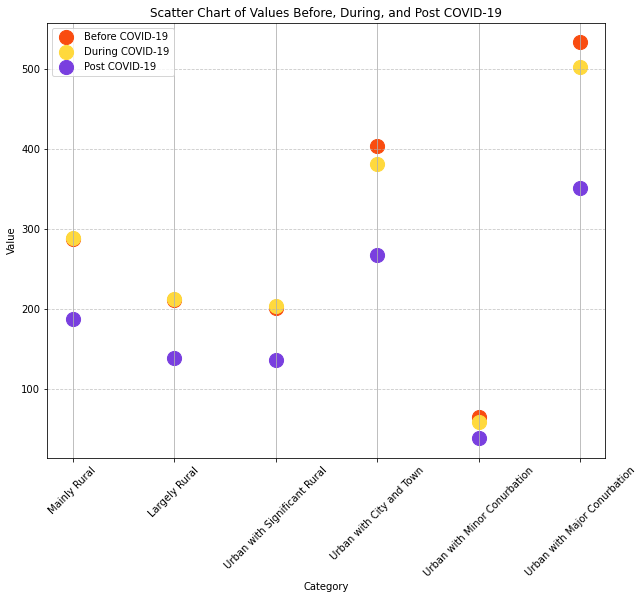

In [35]:
# Visualisation of daily housing sales in six settlements

import matplotlib.pyplot as plt

categories = ["Mainly Rural", "Largely Rural", "Urban with Significant Rural", 
              "Urban with City and Town", "Urban with Minor Conurbation", "Urban with Major Conurbation"]

before_covid = [286.889, 210.904, 201.131, 403.720, 64.669, 532.830]
during_covid = [288.017, 212.471, 203.609, 381.201, 57.913, 501.551]
post_covid = [186.918, 138.651, 135.348, 266.533, 38.598, 351.192]

plt.figure(figsize=(10, 8))
plt.scatter(categories, before_covid, color='#F94C10', label='Before COVID-19', s=200)
plt.scatter(categories, during_covid, color='#FFD93D', label='During COVID-19', s=200)
plt.scatter(categories, post_covid, color='#793FDF', label='Post COVID-19', s=200)

plt.ylabel('Value')
plt.xlabel('Category')
plt.title('Scatter Chart of Values Before, During, and Post COVID-19')
plt.xticks(rotation=45)

# Increase spacing between Y-axis values
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(base=100))  # Adjust the base value as needed


plt.legend()
plt.grid(True)
plt.show()
